# Covid-19 analysis worldwide


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In D:\Asoftware\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In D:\Asoftware\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\Asoftware\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In D:\Asoftware\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\Asoftware\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.



### 2.1: Reading in the datasets (2 marks)
Read columns "country, date, cases" from file "confirmed\_cases\_by\_country.csv" into a dataframe called "cases\_by\_country".
Read columns "is\_china, date, cases" from "confirmed\_cases\_china\_vs\_world.csv" into a dataframe called "cases\_all". Rename the column "is\_china" to "country" (hint you may use .rename()). Then split this dataframe into two new ones: cases in China ("cases\_china") and cases elsewhere ("cases\_not\_china"). 

In [2]:
#import data from confirmed_cases_by_country
dat_con = pd.read_csv('C:/Users/qiankj/Desktop/coursework2/data_for_part2/confirmed_cases_by_country.csv')
df_con = pd.DataFrame(dat_con)
#import data from confirmed_cases_china_vs_world
dat_vs = pd.read_csv('C:/Users/qiankj/Desktop/coursework2/data_for_part2/confirmed_cases_china_vs_world.csv')
df_vs = pd.DataFrame(dat_vs)

In [3]:
#Dataframe of cases by country
cases_by_country = df_con[['country','date','cases']]
#Dataframe of cases from 'china vs world.csv'
cases_all = df_vs[['is_china','date','cases']]
cases_all.rename(columns={'is_china':'country'}, inplace = True)
#China cases
cases_china = cases_all.loc[cases_all["country"] == "China"]
print(cases_china.head())
#Cases in other countries
cases_not_china = cases_all.loc[cases_all["country"] == "Not China"]
print(cases_not_china.head())

  country        date  cases
0   China  2020-01-22    548
1   China  2020-01-23     95
2   China  2020-01-24    277
3   China  2020-01-25    486
4   China  2020-01-26    669
      country        date  cases
56  Not China  2020-01-22      7
57  Not China  2020-01-23      3
58  Not China  2020-01-24     11
59  Not China  2020-01-25      7
60  Not China  2020-01-26     15


D:\Asoftware\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


### 2.2: Summarising the total number of confirmed cases by country (3 marks)
Obtain the January records for "cases\_by\_country" and "cases\_china" and summarise cases in China against cases in other countries in a dataframe for this month. Repeat this procedure for February and March. 
Create a bar plot to compare cases in China with cases in the 5 countries with most cases outside China for January, February and March. 

In January:

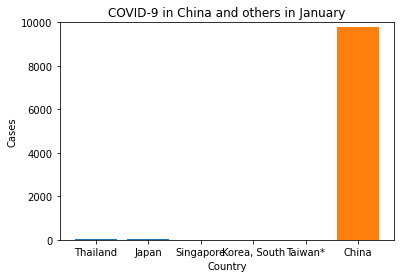

In [4]:
#In China
January_china = cases_china.loc[cases_china["date"].str.contains("2020-01")]
#sum
January_china = January_china.groupby(["country"],as_index = False)
January_china = January_china["cases"].aggregate(np.sum)

#In other countries
January_country = cases_by_country.loc[cases_by_country["date"].str.contains("2020-01")]
#sum
January_country = January_country.groupby(["country"],as_index = False)
January_country = January_country["cases"].aggregate(np.sum)
#Sort values
January_country = pd.DataFrame(January_country).sort_values(by=["cases"],ascending=False)
January_country = January_country.iloc[:5,:]

#plot the bar chart
plot_x_JanCountry = January_country["country"]
plot_y_JanCountry = January_country["cases"]
plot_x_JanChina = January_china["country"]
plot_y_JanChina = January_china["cases"]
plt.bar(plot_x_JanCountry,plot_y_JanCountry)
plt.bar(plot_x_JanChina,plot_y_JanChina)
plt.ylim(0,10000)
plt.title("COVID-9 in China and others in January")
plt.xlabel('Country')
plt.ylabel('Cases')
plt.show()

In February:

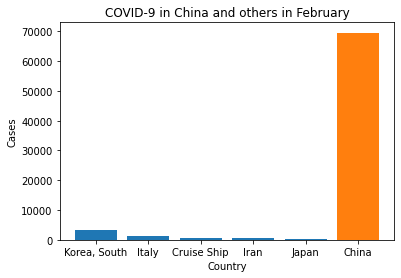

In [5]:
#In China
Feb_china = cases_china.loc[cases_china["date"].str.contains("2020-02")]
#sum
Feb_china = Feb_china.groupby(["country"],as_index = False)
Feb_china = Feb_china["cases"].aggregate(np.sum)

#In other countries
Feb_country = cases_by_country.loc[cases_by_country["date"].str.contains("2020-02")]
#sum
Feb_country = Feb_country.groupby(["country"],as_index = False)
Feb_country = Feb_country["cases"].aggregate(np.sum)
#Sort
Feb_country = pd.DataFrame(Feb_country).sort_values(by=["cases"],ascending=False)
Feb_country = Feb_country.iloc[:5,:]

#plot the bar chart
plot_x_FebCountry = Feb_country["country"]
plot_y_FebCountry = Feb_country["cases"]
plot_x_FebChina = Feb_china["country"]
plot_y_FebChina = Feb_china["cases"]
plt.bar(plot_x_FebCountry,plot_y_FebCountry)
plt.bar(plot_x_FebChina,plot_y_FebChina)
plt.title("COVID-9 in China and others in February")
plt.xlabel('Country')
plt.ylabel('Cases')
plt.show()

In March:

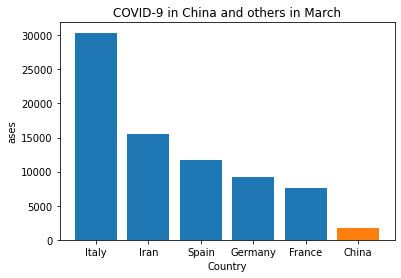

In [6]:
#In China
March_china = cases_china.loc[cases_china["date"].str.contains("2020-03")]
#sum
March_china = March_china.groupby(["country"],as_index = False)
March_china = March_china["cases"].aggregate(np.sum)
March_china = pd.DataFrame(March_china)

#In other countries
March_country = cases_by_country.loc[cases_by_country["date"].str.contains("2020-03")]
#sum
March_country = March_country.groupby(["country"],as_index = False)
March_country = March_country["cases"].aggregate(np.sum)
#sort
March_country = pd.DataFrame(March_country).sort_values(by=["cases"],ascending=False)
March_country = March_country.iloc[:5,:]

#plot the bar chart
plot_x_MarCountry = March_country["country"]
plot_y_MarCountry = March_country["cases"]
plot_x_MarChina = March_china["country"]
plot_y_MarChina = March_china["cases"]
plt.bar(plot_x_MarCountry,plot_y_MarCountry)
plt.bar(plot_x_MarChina,plot_y_MarChina)
plt.title("COVID-9 in China and others in March")
plt.xlabel('Country')
plt.ylabel('ases')
plt.show()

### 2.3: Plotting the accumulated cases by date (2 marks)

Add a new column called "acc\_cases" in both  "cases\_not\_china" and "cases\_china" dataframes, which contains the accumulated number of cases by date. Create a time series plot for "acc\_cases" column in "cases\_not\_china" dataframe.

D:\Asoftware\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Asoftware\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


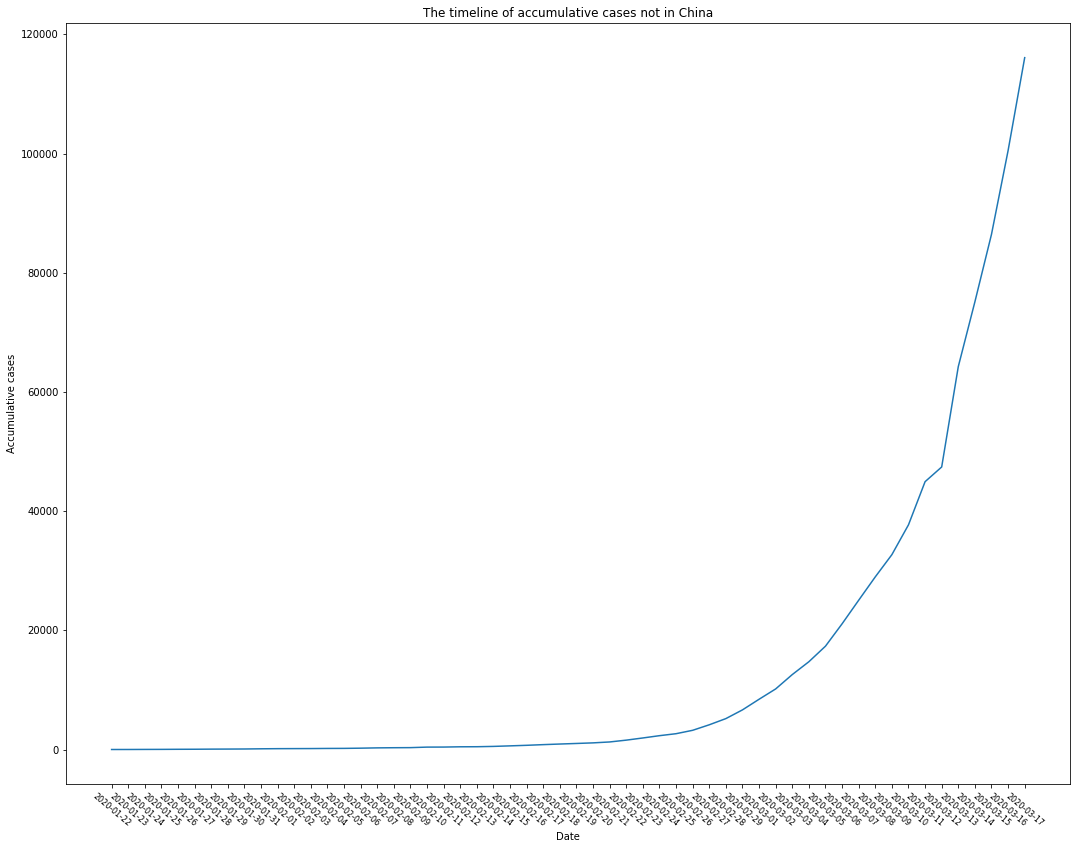

In [7]:
#cases in China
cases_china['acc_cases']=cases_china['cases'].cumsum()

#cases not in China
cases_not_china['acc_cases']=cases_not_china['cases'].cumsum()
#cases_not_china
cases_china

plot_x = cases_not_china["date"]
plot_y = cases_not_china["acc_cases"]
fig = plt.figure(figsize=(18,14))
plt.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=-40)
plt.title("The timeline of accumulative cases not in China")
plt.xlabel("Date")
plt.ylabel("Accumulative cases")
plt.plot(plot_x,plot_y)
plt.show()

### 2.4: Analysing across countries (3 marks)
When the number of COVID-19 cases became higher than 10,000 in China, what was the number of cases for all other counties in that day? Print the 5 countries with highest number of cases. 


During the first 5 days that the daily cases in China dropped below 100, what is average number of cases for other countries? Report the top 5 countries with average number of cases.

In [8]:
#the date that cases higher than 10,000 in Chian
cs_CHN = cases_china.loc[cases_china["cases"]>10000]
#cases in other countries that day
country_for_max = cases_by_country.loc[cases_by_country["date"] == cs_CHN.iloc[0,1]]
#five countries with highest cases
country_fv_max = country_for_max.groupby(["country"],as_index=False)
country_fv_max = country_fv_max["cases"].aggregate(np.sum)
country_fv_max = pd.DataFrame(country_fv_max).sort_values(by=["cases"],ascending=False)
country_fv_max = country_fv_max.iloc[:5,:]
print(country_fv_max)

         country  cases
123    Singapore      8
150      Vietnam      1
143           US      1
85      Malaysia      1
108  Philippines      0


In [9]:
#the first five days in China
cs_CHN_100 = cases_china.loc[cases_china["cases"]< 100]
cs_CHN_100 = pd.DataFrame(cs_CHN_100).iloc[:5,:]
print(cs_CHN_100)
#creat a empty dataframe
df_empty = pd.DataFrame()
#every countries' cases for the five days
for i in range(0,5):
    country_for_average = cases_by_country.loc[cases_by_country["date"] == cs_CHN_100.iloc[i,1]]
    country_for_average = country_for_average.groupby(["country"],as_index = False)
    country_for_average = country_for_average["cases"].aggregate(np.sum)
    df_empty['country'] = country_for_average['country']
    df_empty[i] = country_for_average['cases']
#calculate the mean of cases for each country
df_empty["mean"]=df_empty[[0,1,2,3,4]].mean(axis=1)
df_mean=pd.DataFrame(columns=['country','mean'])
df_mean['country'] = df_empty['country']
df_mean['mean'] = df_empty['mean']
df_mean=df_mean.sort_values(by=['mean'],ascending=False)
print(df_mean)
#top 5 countries with average number of cases
df_fv_top=df_mean[0:5]
print(df_fv_top)

   country        date  cases  acc_cases
1    China  2020-01-23     95        643
32   China  2020-02-23     21      77022
45   China  2020-03-07     80      80770
46   China  2020-03-08     53      80823
47   China  2020-03-09     37      80860
                      country   mean
69                      Italy  925.8
65                       Iran  485.8
76               Korea, South  210.8
128                     Spain  134.6
48                     France  112.2
51                    Germany  101.2
143                        US   64.2
98                Netherlands   38.6
133               Switzerland   32.0
146            United Kingdom   31.6
132                    Sweden   29.4
15                    Belgium   26.0
71                      Japan   23.0
102                    Norway   19.4
9                     Austria   15.2
39                    Denmark   13.6
35                Cruise Ship   11.4
42                      Egypt    8.0
11                    Bahrain    7.0
85            

The top five countries with average number of cases are shown as follows:

| Rankings | Country | Mean |
| :-----:| :----: | :----: |
| 1 | Italy | 925.8 |
| 2 | Iran | 485.8 |
| 3 | Korea, South | 210.8 |
| 4 | Spain | 134.6 |
| 5 | France | 112.2 |

